In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from datetime import datetime
import matplotlib.pyplot as plt

This notebook encodes economic predictor we gathered from internet into an aggregated economic metric that we called economic development metic (EDI). We also visualize the EDI for 10 countries from 2008 to 2020 to see the economic impact of COVID-19.

### Import Dataset

In [19]:
# combined_indicators.csv contains the economic indicators from 2008 to 2020
all_indicators = pd.read_csv('../Data/all_indicators.csv')
all_indicators.head()

,Unnamed: 0,index,Core CPI,Unemployment rate,Stock Markets,country,GDP in US$
0,0,2008-01-01,90.153723,11.157871,87.101121,Brazil,3662800.0
1,1,2008-02-01,90.694644,11.312779,94.025339,Brazil,3662800.0
2,2,2008-03-01,91.111840,10.791905,93.490682,Brazil,3662800.0
3,3,2008-04-01,91.631178,10.700540,98.750100,Brazil,3701400.0
4,4,2008-05-01,92.217617,9.939990,111.320716,Brazil,3701400.0


In [20]:
# Here are the countries we investigated
print(all_indicators['country'].unique())

['Brazil' 'Canada' 'HongKong' 'Japan' 'Mexico' 'Russia' 'SouthAfrica'
 'Thailand' 'UnitedKingdom' 'UnitedStates']


### Aggregate Indexes Using PCA

In [21]:
indicators = ['Unemployment rate', 'Stock Markets', 'GDP in  US$']
features = all_indicators[indicators]
# Change Umployment rate to employment rate.
features['Employment rate'] = 100 - features['Unemployment rate']
indicators = ['Employment rate', 'Stock Markets', 'GDP in  US$']
features = features[indicators]
features.head()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Employment rate,Stock Markets,GDP in US$
0,88.842129,87.101121,3662800.0
1,88.687221,94.025339,3662800.0
2,89.208095,93.490682,3662800.0
3,89.299460,98.750100,3701400.0
4,90.060010,111.320716,3701400.0


In [22]:
# Normalize all predictors
scaler = StandardScaler()
features = scaler.fit_transform(features)

In [23]:
# Use PCA to aggregate the 3 indicators into 1
# The aggregated index is named EDI
pca = PCA(n_components=1)
EDI = pca.fit_transform(features)

In [24]:
EDI_df = all_indicators
EDI_df['EDI'] = EDI
# make EDI a positive value
EDI_df['EDI'] += EDI_df['EDI']+5
final_columns = ['country', 'index', 'EDI']
EDI_df = EDI_df[final_columns]
EDI_df.head()

,country,index,EDI
0,Brazil,2008-01-01,2.375691
1,Brazil,2008-02-01,2.556433
2,Brazil,2008-03-01,2.623345
3,Brazil,2008-04-01,2.859230
4,Brazil,2008-05-01,3.352902


### Export Dataset

In [25]:
#EDI_df.to_csv('EDI_indicators.csv',index=False)

### Visualize

In [26]:
EDI = pd.read_csv('../Data/EDI_indicators.csv')
EDI['index'] = pd.to_datetime(EDI['index'])
EDI.head()

,country,index,EDI
0,Brazil,2008-01-01,2.375691
1,Brazil,2008-02-01,2.556433
2,Brazil,2008-03-01,2.623345
3,Brazil,2008-04-01,2.859230
4,Brazil,2008-05-01,3.352902


In [27]:
# Here are the countries we investigated
print(EDI['country'].unique())

['Brazil' 'Canada' 'HongKong' 'Japan' 'Mexico' 'Russia' 'SouthAfrica'
 'Thailand' 'UnitedKingdom' 'UnitedStates']


In [28]:
# Enter a country to plot the EDI from 2008-2020
def plot_EDI(country):
    country_df = EDI[EDI['country'] == country]
    plt.plot(country_df['index'], country_df['EDI'])
    plt.title('EDI over Years: '+country)
    plt.xlabel('Year')
    plt.ylabel('EDI')
    plt.show()

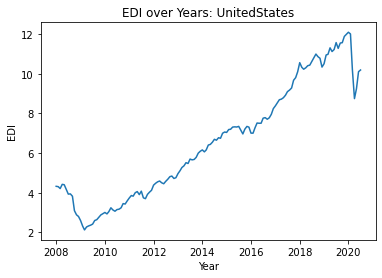

In [29]:
plot_EDI('UnitedStates')
# Represents the economic of COVID-19 very well

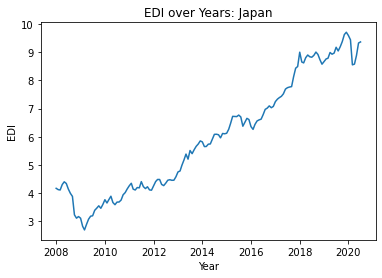

In [30]:
plot_EDI('Japan')
# Japan is less impacted compared to USA